# Lab_3-2: More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

## Question 1
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of energy supply and renewable electricity production from the United Nations ([Energy%20Indicators.xls](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls)) for the year 2013, and put it into a DataFrame with the variable name of `energy`.

### Data cleaning and munging
Keep in mind that this is an Excel file and not a comma separated values (CSV) file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 ($10^6$) gigajoules in a petajoule). For all countries which have missing data (e.g., data with "..."), make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

SyntaxError: illegal target for annotation (<ipython-input-2-7056703bd9dc>, line 1)

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g.:

`'Bolivia (Plurinational State of)'` should be `'Bolivia'` and `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `world_bank.csv`, which should be a csv containing countries' GDP from 1960 onwards from the [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD): [world_bank.csv](http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv). Call this DataFrame `GDP`.

Make sure to skip the header, and rename the following list of countries:

In [ ]:
"Korea, Rep.": "South Korea",
"Iran, slamic IRep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx` (or its equivalent: [scimagojr.xlsx](https://www.scimagojr.com/countryrank.php?category=2102&out=xls)), which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame `ScimEn`.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years that are in common of GDP data and only the top 15 countries by Scimagojr `Rank` (Rank 1 through 15). Tip: You could do this by dropping columns 1 - 50 for GDP first and then you'd only have 2006 - 2015 so you can then do the merge before selecting the top 15 (but you could also do it the other way by first merging and then dropping, as well).

The index of this DataFrame should be the name of the country, and the columns should be (supposing years 2006 - 2015):

`['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',  'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']`

*This function should return a DataFrame with 20 columns and 15 entries.*

In [2]:
import pandas as pd
import numpy as np

def answer_one():
    # File path
    path = r'/content/drive/MyDrive/Colab Notebooks/ML Class/Week 11/More Pandas/Energy Indicators.xls'
    # Read
    energy = pd.read_excel(path, skiprows=1, header=None)
    # Drop the first two columns
    energy = energy.drop(energy.columns[[0, 1]], axis=1)
    #Drop first 17 rows since there is no countries from that its just nans and other stuff
    energy=energy.drop(energy.index[0:17])
    #Drop last 38 rows for same reason above
    energy=energy.drop(energy.index[-38:])
    # Insert col names
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
    # Convert Energy Supply to gigajoules
    energy['Energy Supply'] = energy['Energy Supply'] * 1e6
    # insert np.nan
    energy = energy.fillna(np.nan)
    #Remove extra chars
    energy['Country'] = energy['Country'].str.strip()
    energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
    energy['Country'] = energy['Country'].str.replace(r'\(.*\)', '', regex=True)
    #engery country map
    energy_country_mapping = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    }
    energy['Country'] = energy['Country'].replace(energy_country_mapping)

    world_bank_path = r"/content/drive/MyDrive/Colab Notebooks/ML Class/Week 11/More Pandas/world_bank-API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4687797.csv"
    #world bank path map
    gdp_country_mapping = {
        "Korea, Rep.": "South Korea",
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"
    }
    #read data
    GDP = pd.read_csv(world_bank_path, skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace(gdp_country_mapping)

    SciemPath=r"/content/drive/MyDrive/Colab Notebooks/ML Class/Week 11/More Pandas/scimagojr country rank 1996-2021.xlsx"
    ScimEn = pd.read_excel(SciemPath)
    ScimEn=ScimEn[0:15]

    #Gather gdp data from years 2006-2015
    #GDP = GDP.drop(GDP.columns[1:50], axis=1)
    columns = []
    columns.append('Country Name')
    for year in range(2006, 2016):
        columns.append(str(year))

    GDP = GDP[columns]
    #Iran for some reason had some extra chars and wouldnt show up so i had to strip
    energy['Country'] = energy['Country'].str.strip()
    ScimEn['Country'] = ScimEn['Country'].str.strip()
    #merge data
    merged_data = pd.merge(ScimEn, energy, on='Country', how='inner')
    merged_data = pd.merge(merged_data, GDP, left_on='Country', right_on='Country Name', how='inner')
    merged_data = merged_data.set_index('Country')
    merged_data = merged_data.drop(columns=['Country Name'])
    merged_data=merged_data.drop(columns=["Region"])

    return merged_data


a= answer_one()
print(a.shape)
a.head(15)

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


(15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,303064,301778,3036531,2092737,10.02,273,1.271910e+11,93,19.754910,2.752132e+12,3.550343e+12,4.594307e+12,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13
United States,2,184851,181106,2623922,819242,14.19,389,9.083800e+10,286,11.570980,1.381559e+13,1.447423e+13,1.476986e+13,1.447806e+13,1.504896e+13,1.559973e+13,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13
India,3,60257,58589,590570,213760,9.80,198,3.319500e+10,26,14.969080,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
Japan,4,52780,52281,557023,132113,10.55,203,1.898400e+10,149,10.232820,4.601663e+12,4.579751e+12,5.106679e+12,5.289493e+12,5.759072e+12,6.233147e+12,6.272363e+12,5.212328e+12,4.896994e+12,4.444931e+12
United Kingdom,5,47141,45928,748994,132737,15.89,244,7.920000e+09,124,10.600470,2.717060e+12,3.106182e+12,2.938882e+12,2.425798e+12,2.491110e+12,2.674891e+12,2.719158e+12,2.803291e+12,3.087166e+12,2.956574e+12
Germany,6,42343,41464,528645,115432,12.48,211,1.326100e+10,165,17.901530,2.994704e+12,3.425578e+12,3.745264e+12,3.411261e+12,3.399668e+12,3.749315e+12,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12
Russian Federation,7,39424,39189,142937,67935,3.63,96,3.070900e+10,214,17.288680,9.899305e+11,1.299706e+12,1.660846e+12,1.222644e+12,1.524917e+12,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,1.363481e+12
Canada,8,35588,34940,665415,113363,18.70,246,1.043100e+10,296,61.945430,1.319265e+12,1.468820e+12,1.552990e+12,1.374625e+12,1.617343e+12,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12
Italy,9,31260,29959,433388,105641,13.86,177,6.530000e+09,109,33.667230,1.949552e+12,2.213102e+12,2.408655e+12,2.199929e+12,2.136100e+12,2.294994e+12,2.086958e+12,2.141924e+12,2.162010e+12,1.836638e+12


## Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*


<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Keep intersection only: https://upload.wikimedia.org/wikipedia/commons/8/8d/Intersection_of_3_circles_7.svg</text>
</svg>

In [3]:
import pandas as pd
import numpy as np

def answer_two():
    #Energy data
    # File path
    path = r'/content/drive/MyDrive/Colab Notebooks/ML Class/Week 11/More Pandas/Energy Indicators.xls'
    # Read
    energy = pd.read_excel(path, skiprows=1, header=None)
    # Drop the first two columns
    energy = energy.drop(energy.columns[[0, 1]], axis=1)
    #Drop first 17 rows since there is no countries from that its just nans and other stuff
    energy=energy.drop(energy.index[0:17])
    #Drop last 38 rows for same reason above
    energy=energy.drop(energy.index[-38:])
    # Insert col names
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
    # Convert Energy Supply to gigajoules
    energy['Energy Supply'] = energy['Energy Supply'] * 1e6
    # insert np.nan
    energy = energy.fillna(np.nan)
    #Remove extra chars
    energy['Country'] = energy['Country'].str.strip()
    energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
    energy['Country'] = energy['Country'].str.replace(r'\(.*\)', '', regex=True)
    #engery country map
    energy_country_mapping = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    }
    energy['Country'] = energy['Country'].replace(energy_country_mapping)
    energy_rows = energy.shape[0]

    #World bank data
    world_bank_path = r"/content/drive/MyDrive/Colab Notebooks/ML Class/Week 11/More Pandas/world_bank-API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4687797.csv"
    #world bank path map
    gdp_country_mapping = {
        "Korea, Rep.": "South Korea",
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"
    }
    #read data
    GDP = pd.read_csv(world_bank_path, skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace(gdp_country_mapping)
    gdp_rows = GDP.shape[0]

    #Sciem path
    SciemPath=r"/content/drive/MyDrive/Colab Notebooks/ML Class/Week 11/More Pandas/scimagojr country rank 1996-2021.xlsx"
    ScimEn = pd.read_excel(SciemPath)
    scimen_rows = ScimEn.shape[0]
    #Gather gdp data from years 2006-2015
    #GDP = GDP.drop(GDP.columns[1:50], axis=1)
    columns = []
    columns.append('Country Name')
    for year in range(2006, 2016):
        columns.append(str(year))

    GDP = GDP[columns]
    #Iran for some reason had some extra chars and wouldnt show up so i had to strip
    energy['Country'] = energy['Country'].str.strip()
    ScimEn['Country'] = ScimEn['Country'].str.strip()

    A=answer_one()
    a_rows = A.shape[0]
    lost = (energy_rows+gdp_rows+scimen_rows)-a_rows

    return lost

answer_two()

<ipython-input-3-dff3f6d6f28c>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)
<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


689

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)


## Question 3
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [4]:
def answer_three():
    Top15 = answer_one()
    columns = []
    for i in range(2006, 2016):
        columns.append(str(i))

    avgGDP = Top15[columns].mean(axis=1).sort_values(ascending=False)


    return avgGDP

answer_three()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


,0
Country,
United States,1.570403e+13
China,6.927702e+12
Japan,5.239642e+12
Germany,3.523342e+12
United Kingdom,2.792011e+12
France,2.691337e+12
Italy,2.142986e+12
Brazil,1.988889e+12
Russian Federation,1.666746e+12


## Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [7]:
def answer_four():
   avgGDP=answer_three()
   six = avgGDP.index[5]
   merged=answer_one()
   columns = []
   gdp={}
   for i in range(2006, 2016):
         gdp[i] = merged.loc[six,str(i)]


   change = gdp[2015] - gdp[2006]
   return change


answer_four()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)
<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


118652421857.7998

## Question 5
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [8]:
def answer_five():
    Top15 = answer_one()
    mean = Top15['Energy Supply per Capita'].mean()
    return mean

answer_five()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


157.6

## Question 6
What country has the maximum `% Renewable` and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [10]:
def answer_six():
    Top15 = answer_one()
    max_renewable = Top15['% Renewable'].max()
    country_with_max_renewable = Top15[Top15['% Renewable'] == max_renewable].index[0]
    return (country_with_max_renewable, max_renewable)

a=answer_six()
print(a)
print(type(a))

('Brazil', 69.64803)
<class 'tuple'>


<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


## Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [12]:
def answer_seven():
    Top15 = answer_one()
    Top15["Citations ratio"]=Top15["Self-citations"]/Top15["Citations"]
    max=Top15["Citations ratio"].max()
    country=Top15[Top15["Citations ratio"]==max].index[0]
    return (country,max)
a=answer_seven()
print(a)
print(type(a))

('China', 0.689186772669207)
<class 'tuple'>


<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


## Question 8

Create a column that estimates the population using `Energy Supply` and `Energy Supply per Capita`. What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [18]:
def answer_eight():
    Top15 = answer_one()
    Top15["Estimated Population"]=Top15["Energy Supply"]/Top15["Energy Supply per Capita"]
    Top15=Top15.sort_values("Estimated Population",ascending=False)
    return Top15.index[2]

answer_eight()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


'United States'

## Question 9
Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the `Energy Supply per Capita`? Use the `.corr()` method, (Pearson's correlation), for the correlation.

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between `Energy Supply per Capita` vs. `Citable docs per Capita`)*

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)
<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


0.7272331912434825


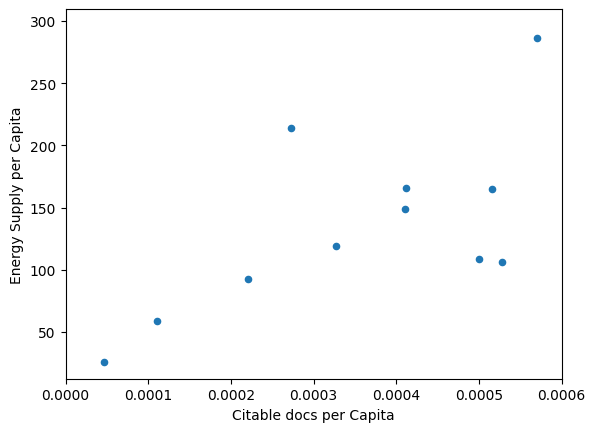

In [27]:

def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    corr = Top15["Energy Supply per Capita"].corr(Top15["Citable docs per Capita"])
    return corr

print(answer_nine())
def plot9():
    import matplotlib as plt
    %matplotlib inline

    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

#plot9() # Be sure to comment out plot9() before submitting the assignment!

## Question 10
Create a new column with a 1 if the country's `% Renewable` value is at or above the median for all countries in the top 15, and a 0 if the country's `% Renewable` value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [42]:
def answer_ten():
    Top15 = answer_one()
    Top15["Rank Renew"]=0
    median=Top15["% Renewable"].median()

    for i in range(len(Top15)):
        if Top15.iloc[i]["% Renewable"]>=median:
            Top15.iloc[i,Top15.columns.get_loc("Rank Renew")]=1

    sort = Top15.sort_values("Rank", ascending=True)

    HighRenew=sort["Rank Renew"]
    return HighRenew
answer_ten()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


,Rank Renew
Country,
China,1
United States,0
India,0
Japan,0
United Kingdom,0
Germany,1
Russian Federation,1
Canada,1
Italy,1


## Question 11
Use the following dictionary to group the Countries by Continent, then create a dataframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [43]:
ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [47]:
def answer_eleven():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Continent'] = Top15.index.map(ContinentDict)
    c_stat = Top15.groupby('Continent')['PopEst'].agg(['size', 'sum', 'mean', 'std'])

    return c_stat



a=answer_eleven()
a.head()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


## Question 12
Cut `% Renewable` into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [55]:
def answer_twelve():
    Top15 = answer_one()
    Top15['Continent'] = Top15.index.map(ContinentDict)
    renewable_bins = pd.cut(Top15['% Renewable'], bins=5)
    country_counts = Top15.groupby(['Continent', renewable_bins]).size()
    return country_counts

answer_twelve()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)
<ipython-input-55-bbe0cfc698cf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_counts = Top15.groupby(['Continent', renewable_bins]).size()


Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

## Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [56]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    for i in range(len(Top15)):
        Top15.iloc[i,Top15.columns.get_loc("PopEst")]=format(Top15.iloc[i, Top15.columns.get_loc("PopEst")], ',')

    return Top15["PopEst"]

answer_thirteen()

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)


,PopEst
Country,
China,"1,367,645,161.2903225"
United States,"317,615,384.61538464"
India,"1,276,730,769.2307692"
Japan,"127,409,395.97315437"
United Kingdom,"63,870,967.741935484"
Germany,"80,369,696.96969697"
Russian Federation,"143,500,000.0"
Canada,"35,239,864.86486486"
Italy,"59,908,256.880733944"


## Optional

Use the built in function `plot_optional()` to see an example visualization.

<ipython-input-2-f12fcbc1bb03>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy = energy.fillna(np.nan)
<ipython-input-57-a30fe1191f8f>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


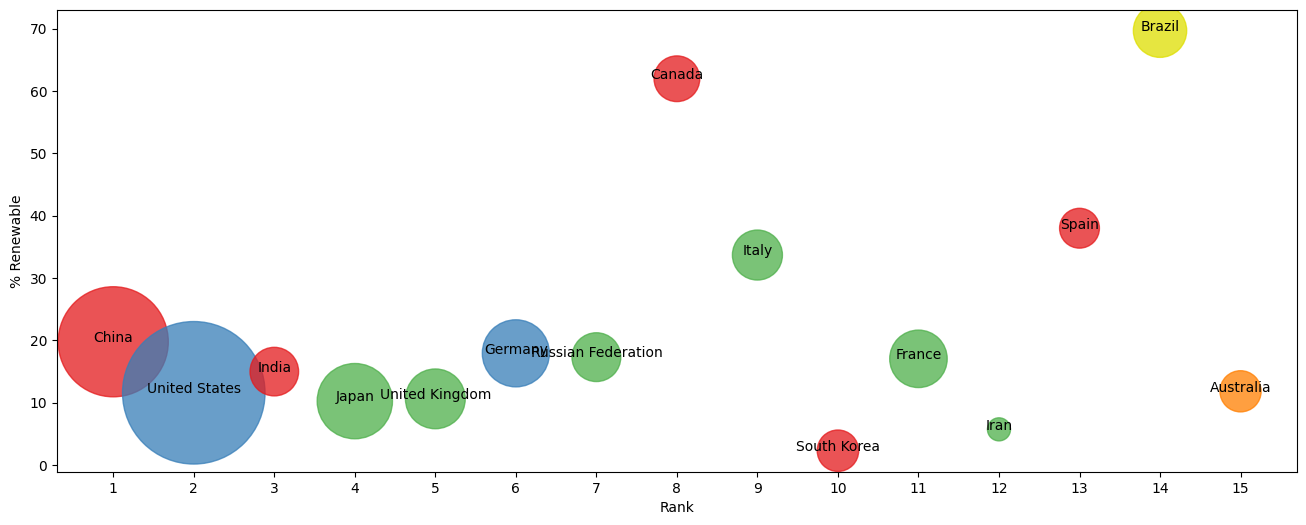

In [57]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'],
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!